In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 500

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

# Кластеризация

Наша задача - предсказать есть диабет у индивида или нет. В качестве таргета - колонка Diabetes. В нем три различных значения: `0`, `1`, `2`. `0` означает, что наблюдаемой здоров, `1` значит, что есть риск диабета, `2` означает наличие диабета. В качестве признаков будем использовать пол, количество лет в США, доход семьи и некоторые показатели, измеренные медицинскими работниками.  

**Задание 1.** В этой части ДЗ попробуем использовать кластеризацию как инструмент при проведении моделирования в задаче классификации

In [2]:
df = pd.read_csv('datahw21.csv', index_col='Unnamed: 0')

df.head()

,Gender,Years_in_US,Family_income,ArmCircum,SaggitalAbdominal,GripStrength,Breast_fed,Diabetes
0,1,0.0,0.84,35.3,20.6,55.2,2.0,2.0
1,1,0.0,1.78,34.7,24.4,61.5,2.0,2.0
2,1,0.0,4.51,33.5,25.6,91.0,2.0,2.0
3,1,0.0,2.52,21.0,14.9,32.2,2.0,0.0
4,2,0.0,5.00,25.2,20.7,30.9,2.0,0.0


<Axes: >

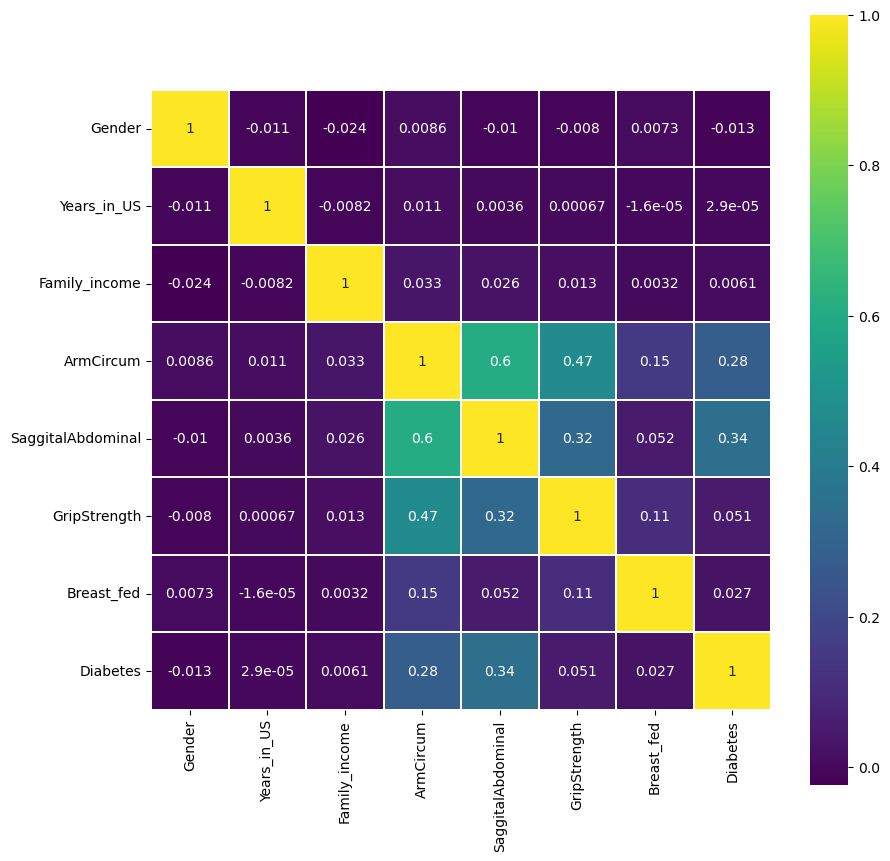

In [14]:
### Посмотрим как устроены данные
### Изобразим корреляционную матрицу

colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, annot=True)

In [15]:
### Разделим выборку на трейн-тест

data = df.drop(['Diabetes'], axis=1)
target = df[['Diabetes']]

X_train, X_test, y_train, y_test = train_test_split(data,
                                                    target, 
                                                    test_size=0.25,
                                                    random_state=1)

Для того, чтобы использовать K-means, лучше будет отнормировать данные. 

In [50]:
### Воспользуемся StandardScaler

### Your code is here
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Обучим K-Means с параметрами `n_clusters` = 3, `tol` = 0.0005. Выбор параметров обусловлен тем, что у нас три возможных значения таргета. Но в целом основной подход подбора количества кластеров - по кривой зависимости внутрикластерного и межкластерного расстояний от количества кластеров.

Установите `random_state` = 1

Посчитаем качество на изначальных данных(нормированных). Для этого обучите с дефолтными параметрами `RandomForestClassifier`, `LogisticRegression`, `LinearSVC`. Там, где нужно, установите `random_state` = 1. (1б)

In [29]:
### Your code is here
forest = RandomForestClassifier(random_state = 1)
forest.fit(X_train_scaled, y_train)
train_preds = forest.predict(X_train_scaled)
test_preds = forest.predict(X_test_scaled)
print(f'Качество на тренировочной выборке случайного леса без использования kmeans: {round(np.mean((train_preds.reshape(-1,1) - y_train)**2),3)}')
print(f'Качество на тестовой выборке случайного леса без использования kmeans: {round(np.mean((test_preds.reshape(-1,1) - y_test)**2),3)}')
print(f'accuracy равно {round(accuracy_score(test_preds, y_test),3)}')

Качество на тренировочной выборке случайного леса без использования kmeans: 0.003
Качество на тестовой выборке случайного леса без использования kmeans: 0.294
accuracy равно 0.886


In [30]:
### Your code is here
log_reg = LogisticRegression(multi_class = 'ovr', random_state = 1)
log_reg.fit(X_train_scaled, y_train)
train_preds = log_reg.predict(X_train_scaled)
test_preds = log_reg.predict(X_test_scaled)
print(f'Качество на тренировочной выборке логистической регрессии без использования kmeans: {round(np.mean((train_preds.reshape(-1,1) - y_train)**2),3)}')
print(f'Качество на тестовой выборке логистической регрессии без использования kmeans: {round(np.mean((test_preds.reshape(-1,1) - y_test)**2),3)}')
print(f'accuracy равно {round(accuracy_score(test_preds, y_test),3)}')

Качество на тренировочной выборке логистической регрессии без использования kmeans: 0.324
Качество на тестовой выборке логистической регрессии без использования kmeans: 0.296
accuracy равно 0.888


In [31]:
### Your code is here
svm_model = LinearSVC(multi_class = 'ovr', random_state = 1)
svm_model.fit(X_train_scaled, y_train)
train_preds = svm_model.predict(X_train_scaled)
test_preds = svm_model.predict(X_test_scaled)
print(f'Качество на тренировочной выборке метода опорных векторов без использования kmeans: {round(np.mean((train_preds.reshape(-1,1) - y_train)**2),3)}')
print(f'Качество на тестовой выборке метода опорных векторов без использования kmeans: {round(np.mean((test_preds.reshape(-1,1) - y_test)**2),3)}')
print(f'accuracy равно {round(accuracy_score(test_preds, y_test),3)}')

Качество на тренировочной выборке метода опорных векторов без использования kmeans: 0.314
Качество на тестовой выборке метода опорных векторов без использования kmeans: 0.278
accuracy равно 0.892


Добавьте в признаковое описание номер кластера и посчитайте качество с новым признаком! Стало ли качество хоть сколько-то лучше? (1б)

In [51]:
### Your code is here
kmeans = KMeans(n_clusters = 3, tol = 0.0005, random_state = 1)
kmeans.fit(X_train_scaled)

labels = kmeans.predict(X_train_scaled)
labels = labels.reshape(-1)
X_train_scaled = pd.DataFrame(X_train_scaled)
X_train_scaled['labels'] = labels
X_train_scaled

,0,1,2,3,4,5,6,labels
0,-1.017409,-0.198311,-0.311557,0.380926,-0.823248,0.282705,0.388951,0
1,0.982889,-0.198311,0.037744,0.057088,-0.306067,-1.259208,0.388951,1
2,-1.017409,-0.198311,-0.599577,-0.538774,-0.964298,-0.280860,0.388951,0
3,0.982889,-0.198311,-0.446375,0.419786,-0.705707,-0.226757,0.388951,1
4,0.982889,-0.198311,1.686197,0.251391,-0.165018,-0.366521,0.388951,1
...,...,...,...,...,...,...,...,...
7354,-1.017409,-0.198311,0.423813,0.095948,-0.799740,-0.483743,0.388951,0
7355,0.982889,-0.198311,-1.169488,-0.318564,-1.293413,-0.736220,0.388951,1
7356,0.982889,-0.198311,0.932443,0.406833,-0.635182,0.652404,0.388951,1
7357,-1.017409,-0.198311,-0.856956,-1.341892,-0.070985,-0.100519,-2.571018,0


In [52]:
labels = kmeans.predict(X_test_scaled)
labels = labels.reshape(-1)
X_test_scaled = pd.DataFrame(X_test_scaled)
X_test_scaled['labels'] = labels
X_test_scaled

,0,1,2,3,4,5,6,labels
0,0.982889,-0.198311,1.686197,1.171090,1.621608,-0.068959,0.388951,2
1,0.982889,-0.198311,-1.249153,0.536368,-0.635182,1.563125,0.388951,2
2,0.982889,-0.198311,-0.722138,0.924974,1.221968,0.629861,0.388951,2
3,-1.017409,-0.198311,-0.936621,-0.266750,-0.917281,-0.204215,0.388951,0
4,-1.017409,-0.198311,1.686197,0.639996,0.093573,1.008577,-2.571018,0
...,...,...,...,...,...,...,...,...
2449,0.982889,0.591879,-0.207380,0.471600,0.140589,0.363859,0.388951,2
2450,-1.017409,-0.198311,-0.679242,-1.303032,-1.834102,-1.903927,0.388951,0
2451,0.982889,-0.198311,1.686197,0.704764,-0.070985,-0.100519,0.388951,1
2452,-1.017409,-0.198311,1.097901,-0.020633,-0.188526,2.054554,0.388951,2


In [54]:
### Your code is here
forest = RandomForestClassifier(random_state = 1)
forest.fit(X_train_scaled.values, y_train)
train_preds = forest.predict(X_train_scaled.values)
test_preds = forest.predict(X_test_scaled.values)
print(f'Качество на тренировочной выборке случайного леса без использования kmeans: {round(np.mean((train_preds.reshape(-1,1) - y_train)**2),3)}')
print(f'Качество на тестовой выборке случайного леса без использования kmeans: {round(np.mean((test_preds.reshape(-1,1) - y_test)**2),3)}')
print(f'accuracy равно {round(accuracy_score(test_preds, y_test),3)}')

Качество на тренировочной выборке случайного леса без использования kmeans: 0.003
Качество на тестовой выборке случайного леса без использования kmeans: 0.287
accuracy равно 0.888


In [55]:
log_reg = LogisticRegression(multi_class = 'ovr', random_state = 1)
log_reg.fit(X_train_scaled.values, y_train)
train_preds = log_reg.predict(X_train_scaled.values)
test_preds = log_reg.predict(X_test_scaled.values)
print(f'Качество на тренировочной выборке логистической регрессии без использования kmeans: {round(np.mean((train_preds.reshape(-1,1) - y_train)**2),3)}')
print(f'Качество на тестовой выборке логистической регрессии без использования kmeans: {round(np.mean((test_preds.reshape(-1,1) - y_test)**2),3)}')
print(f'accuracy равно {round(accuracy_score(test_preds, y_test),3)}')

Качество на тренировочной выборке логистической регрессии без использования kmeans: 0.324
Качество на тестовой выборке логистической регрессии без использования kmeans: 0.296
accuracy равно 0.888


In [56]:
### Your code is here
svm_model = LinearSVC(multi_class = 'ovr', random_state = 1)
svm_model.fit(X_train_scaled.values, y_train)
train_preds = svm_model.predict(X_train_scaled.values)
test_preds = svm_model.predict(X_test_scaled.values)
print(f'Качество на тренировочной выборке метода опорных векторов без использования kmeans: {round(np.mean((train_preds.reshape(-1,1) - y_train)**2),3)}')
print(f'Качество на тестовой выборке метода опорных векторов без использования kmeans: {round(np.mean((test_preds.reshape(-1,1) - y_test)**2),3)}')
print(f'accuracy равно {round(accuracy_score(test_preds, y_test),3)}')

Качество на тренировочной выборке метода опорных векторов без использования kmeans: 0.314
Качество на тестовой выборке метода опорных векторов без использования kmeans: 0.275
accuracy равно 0.893


Посчитаем расстояния от объектов до центров кластеров. Для этого воспользуемся методом `transform` обученного класса kmeans.

Обучим и посчитаем метрики исключительно на расстояниях до центра. Убедимся, что такой подход имеет право на существование, если данные позволяют, то качество не сильно должно пострадать. А в каких-то случаях может оказаться даже лучше! Таким образом можно снижать размерность данных. (2б)

In [58]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [63]:
cluster_distances_train = kmeans.transform(X_train_scaled)
cluster_distances_test = kmeans.transform(X_test_scaled)
rf = RandomForestClassifier(random_state = 1)
lr = LogisticRegression(multi_class = 'ovr', random_state = 1)
svm = LinearSVC(multi_class = 'ovr', random_state = 1)
rf.fit(cluster_distances_train, y_train)
lr.fit(cluster_distances_train, y_train)
svm.fit(cluster_distances_train, y_train)

rf_test_preds = rf.predict(cluster_distances_test)
lr_test_preds = lr.predict(cluster_distances_test)
svm_test_preds = svm.predict(cluster_distances_test)

print(f'accuracy для случайного леса равно {round(accuracy_score(rf_test_preds, y_test),3)}')
print(f'accuracy для логистической регрессии равно {round(accuracy_score(lr_test_preds, y_test),3)}')
print(f'accuracy для метода случайных векторов равно {round(accuracy_score(svm_test_preds, y_test),3)}')

accuracy для случайного леса равно 0.883
accuracy для логистической регрессии равно 0.892
accuracy для метода случайных векторов равно 0.892
